In [43]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_selector, ColumnTransformer, make_column_transformer
# sklearn.compose: The sklearn.compose module is a submodule of the sklearn library for machine learning in Python. It provides functions for creating complex preprocessing and modeling pipelines.
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,RobustScaler
#sklearn.preprocessing: The sklearn.preprocessing module is a submodule of the sklearn library that provides functions for preprocessing data, such as scaling and normalizing features, imputing missing values, and encoding categorical variables.
from sklearn.linear_model import Ridge,LinearRegression,Lasso, ElasticNet
# sklearn.linear_model: The sklearn.linear_model module is a submodule of the sklearn library that provides functions for fitting linear models for regression and classification.
from sklearn.pipeline import make_pipeline
# sklearn.pipeline: The sklearn.pipeline module is a submodule of the sklearn library that provides functions for creating and working with pipelines of transformers and models.
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve, RandomizedSearchCV, cross_val_score, KFold
# sklearn.model_selection: The sklearn.model_selection module is a submodule of the sklearn library that provides functions for splitting data into training and test sets, evaluating models using cross-validation, and hyperparameter tuning.
from sklearn.dummy import DummyRegressor
# sklearn.dummy: The sklearn.dummy module is a submodule of the sklearn library that provides simple dummy models for regression and classification.

from sklearn.metrics import *
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
import my_functions
from statistics import mean
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [44]:
# chargement et affichage des données
data = pd.read_csv('../data.csv')
def classify_bmi(row):
    if row["bmi"] < 25:
        return "normal"
    elif row["bmi"] < 30:
        return "overweight"
    else:
        return "obese"

data["bmi_class"] = data.apply(classify_bmi, axis=1)

# Remove duplicates from the 'data' DataFrame
df = data.drop_duplicates()

In [45]:
## chargement et affichage des données
#data = pd.read_csv('../data.csv')
#def classify_bmi(row):
#    if row["bmi"] < 18.5:
#        return "underweight"
#    elif row["bmi"] < 25:
#        return "normal"
#    elif row["bmi"] < 30:
#        return "overweight"
#    elif row["bmi"] < 35:
#        return "obese"
#    else:
#        return "severely obese"
#data["bmi_class"] = data.apply(classify_bmi, axis=1)
## Remove duplicates from the 'data' DataFrame
#df = data.drop_duplicates()
## Drop Bmi
#df.drop("bmi", axis=1, inplace=True)

In [46]:
# Select the 'charges' column and store it in a separate DataFrame
y = df[['charges']]
# Drop the 'charges' column from the 'data' DataFrame and store the rest of the columns in a separate DataFrame
X = df.drop(columns=['charges'])
metrics = []

def make_pipeline_to_ML(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=X[['smoker']])
    numerical_features = make_column_selector(dtype_include=np.number)
    categorical_features = make_column_selector(dtype_exclude= np.number)
    numerical_pipeline = make_pipeline(StandardScaler(with_mean=False))
    categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
    preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                    (categorical_pipeline, categorical_features)
                                    )
    return preprocessor, X_train, X_test, y_train, y_test




len(X_train) : 1069


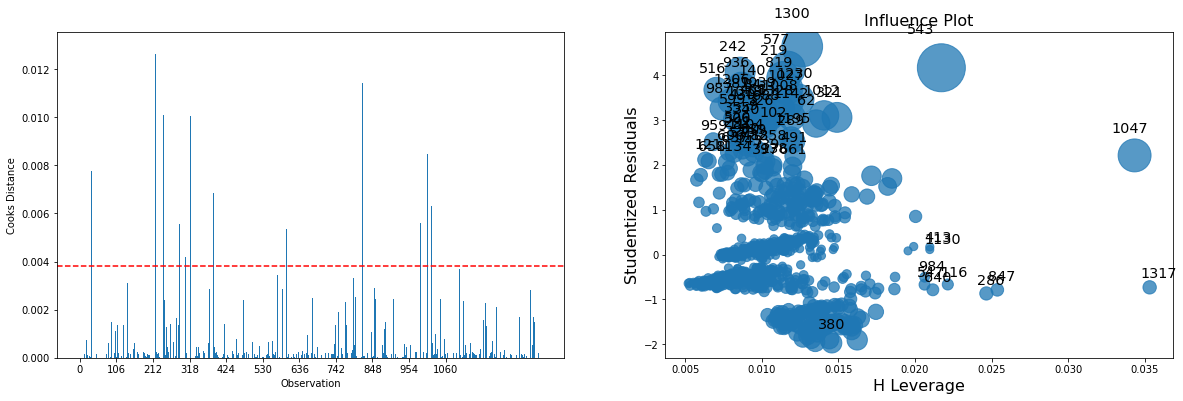

Removed :  -46 values


In [47]:
preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)
last_len_X_train = len(X_train)
print(f"len(X_train) : {len(X_train)}")
index_to_be_removed = my_functions.get_index_to_remove_by_Cooks_Distance(X_train=X_train, y_train=y_train, preprocessor=preprocessor, divided_by="ALL")
X_train = X_train.drop(index=index_to_be_removed.values)
y_train = y_train.drop(index=index_to_be_removed.values)
print(f"Removed :  {len(X_train) - last_len_X_train} values")

In [48]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, LR_model_1 = my_functions.LR_with_CV(PolynomialFeatures_degree = 1, 
                    X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                    preprocessor = preprocessor, shuffle=True, random_state=42,
                    isplot = False, isinfo = False, include_learning_curve = False) 
    
metrics.append(["LR with Kfold CV (Polynomial degree=1)", R2, MAE, RMSE, Model_score_test, 
                    Model_score_training, "%0.4f (+/- %0.2f)" % (scores_mean, scores_std)])



In [49]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, LR_model_2 = my_functions.LR_with_CV(PolynomialFeatures_degree = 2, 
                    X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                    preprocessor = preprocessor, shuffle=True, random_state=42,
                    isplot = False, isinfo = False, include_learning_curve = False) 
    
metrics.append(["LR with Kfold CV (Polynomial degree=2)", R2, MAE, RMSE, Model_score_test, 
                    Model_score_training, "%0.4f (+/- %0.2f)" % (scores_mean, scores_std)])

In [50]:
################################
################################
#
# Get best Hypermarameters
#
################################
################################


#my_functions.get_best_params(
#    PolynomialFeatures_degree = 2,  
#    model=Lasso(max_iter=100000, 
#    tol=0.0001,
#    random_state=42, 
#    selection='cyclic'),   
#    param_grid= {'lasso__alpha': np.linspace(30,40,200)}, 
#    preprocessor = preprocessor, 
#    X_train = X_train, 
#    y_train = y_train)


In [51]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha, Lasso_model_1 = my_functions.LASSO_with_CV(PolynomialFeatures_degree = 1, Best_alpha= 39.4321608040201,
                X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                preprocessor = preprocessor, shuffle=True, random_state=42,
                isplot = False, isinfo = False, include_learning_curve = False) 


metrics.append(["LASSO (Polynomial degree=1)", R2, MAE, RMSE, Model_score_test, 
                Model_score_training, "%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)}"])


In [52]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha, Lasso_model_2 = my_functions.LASSO_with_CV(PolynomialFeatures_degree = 2, Best_alpha= 39.4321608040201,
                X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                preprocessor = preprocessor, shuffle=True, random_state=42,
                isplot = False, isinfo = False, include_learning_curve = False) 


metrics.append(["LASSO (Polynomial degree=2)", R2, MAE, RMSE, Model_score_test, 
                Model_score_training, "%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)}"])

In [53]:
#best = my_functions.get_best_params(PolynomialFeatures_degree = 1,  model=Ridge(max_iter=100000, tol=0.0001,random_state=42),   param_grid= {'ridge__alpha': np.linspace(1,3,200)}, preprocessor = preprocessor, X_train = X_train, y_train = y_train)
#best

In [54]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha, Ridge_model_1 = my_functions.Ridge_with_CV(PolynomialFeatures_degree = 1, Best_alpha=  1.4623115577889447,
                X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                preprocessor = preprocessor, shuffle=True, random_state=42,
                isplot = False, isinfo = False, include_learning_curve = False) 

metrics.append(["Ridg (Polynomial degree=1)", R2, MAE, RMSE, Model_score_test, Model_score_training ,"%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)}"])


In [55]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha, Ridge_model_2 = my_functions.Ridge_with_CV(PolynomialFeatures_degree = 2, Best_alpha=  1.4623115577889447,
                X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                preprocessor = preprocessor, shuffle=True, random_state=42,
                isplot = False, isinfo = False, include_learning_curve = False) 

metrics.append(["Ridg (Polynomial degree=2)", R2, MAE, RMSE, Model_score_test, Model_score_training ,"%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)}"])


In [56]:
# best = my_functions.get_best_params(PolynomialFeatures_degree = 2,  model=ElasticNet(max_iter=100000, tol=0.0001,random_state=42),   param_grid = {'elasticnet__alpha': np.linspace(49, 51, 200), 
#                 'elasticnet__l1_ratio': [0.9999999]}, 
#                 preprocessor = preprocessor, X_train = X_train, y_train = y_train)

In [57]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha, Best_elasticnet__l1_ratio, ElasticNet_model_1 = my_functions.ElasticNet_with_CV(PolynomialFeatures_degree =1, Best_alpha = 33.24120603015076, 
    Best_elasticnet__l1_ratio = 0.9999999, 
    X_train = X_train, y_train = y_train 
    , X_test = X_test , y_test = y_test, 
    preprocessor = preprocessor , shuffle=True, 
    random_state=42, isplot= False, isinfo = False, include_learning_curve = False)

metrics.append(["ElasticNet (Polynomial degree=1)", R2, MAE, RMSE, Model_score_test, Model_score_training ,"%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)} Best_ratio : {round(Best_elasticnet__l1_ratio,3)}"])

In [58]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha, Best_elasticnet__l1_ratio, ElasticNet_model_2 = my_functions.ElasticNet_with_CV(PolynomialFeatures_degree =2, Best_alpha = 50.00502512562814, 
    Best_elasticnet__l1_ratio = 0.9999999, 
    X_train = X_train, y_train = y_train 
    , X_test = X_test , y_test = y_test, 
    preprocessor = preprocessor , shuffle=True, 
    random_state=42, isplot= False, isinfo = False, include_learning_curve = False)

metrics.append(["ElasticNet (Polynomial degree=2)", R2, MAE, RMSE, Model_score_test, Model_score_training ,"%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)}  Best_ratio : {round(Best_elasticnet__l1_ratio,3)}"])

In [59]:

df_result = pd.DataFrame()
df_result = pd.DataFrame(metrics , columns=['Model' , 'R2' , 'MAE' , 'RMSE', 'Score (test)', 'Score (trainging)' , "CV Accuracy", 'HyperParamter']).sort_values(['CV Accuracy'] , ascending=False, ignore_index=True).set_index('Model')
#df_result = pd.DataFrame(metrics , columns=['Model' , 'R2' , 'MAE' , 'RMSE', 'Score (test)', 'Score (trainging)' , "CV Accuracy"]).sort_values(['MAE' , 'RMSE'] , ignore_index=True).set_index('Model')
df_result

,R2,MAE,RMSE,Score (test),Score (trainging),CV Accuracy,HyperParamter
Model,,,,,,,
LASSO (Polynomial degree=2),0.9167,1406.289577,3284.148115,0.925181,0.931742,0.9289 (+/- 0.03),Best_alpha : 39.432
ElasticNet (Polynomial degree=2),0.9163,1418.113006,3286.189294,0.925088,0.931480,0.9289 (+/- 0.03),Best_alpha : 50.005 Best_ratio : 1.0
Ridg (Polynomial degree=2),0.9156,1405.073555,3316.223550,0.923712,0.933860,0.9260 (+/- 0.03),Best_alpha : 1.462
LR with Kfold CV (Polynomial degree=2),0.9155,1413.818544,3319.371160,0.923567,0.933942,0.9254 (+/- 0.03),None
LASSO (Polynomial degree=1),0.7717,3862.598915,5146.517520,0.816263,0.827428,0.8217 (+/- 0.02),Best_alpha : 39.432
ElasticNet (Polynomial degree=1),0.7723,3870.753779,5149.934507,0.816019,0.827520,0.8217 (+/- 0.02),Best_alpha : 33.241 Best_ratio : 1.0
Ridg (Polynomial degree=1),0.7740,3909.130917,5166.050964,0.814866,0.827780,0.8211 (+/- 0.02),Best_alpha : 1.462
LR with Kfold CV (Polynomial degree=1),0.7756,3916.188022,5168.887972,0.814663,0.827796,0.8210 (+/- 0.02),None


In [60]:
import pickle

pickle_out = open("Lasso_Model.pkl", "wb") 
pickle.dump(Lasso_model_2, pickle_out) 
pickle_out.close()

# Alanyse des résultats

# VIF (variable inflation factor) 
It is a measure of the degree of multicollinearity (correlation among predictor variables) in a multiple regression analysis. The VIF is calculated for each predictor variable by regressing it against all the other predictor variables and then calculating the ratio of the variance of the predicted variable to the variance of the actual variable. A VIF of 1 indicates no multicollinearity, while a VIF greater than 1 indicates that the variable is positively correlated with at least one other predictor variable. A VIF of 2 or greater is generally considered to indicate high multicollinearity.

In [128]:
def make_pipeline_to_ML(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=X[['smoker']])
    numerical_features = make_column_selector(dtype_include=np.number)
    categorical_features = make_column_selector(dtype_exclude= np.number)
    numerical_pipeline = make_pipeline(StandardScaler(),PolynomialFeatures(2))
    categorical_pipeline = make_pipeline(OneHotEncoder())
    preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                    (categorical_pipeline, categorical_features)
                                    )
    return preprocessor, X_train, X_test, y_train, y_test


preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)


preprocessor.fit(X_train)
X_test_pipe = preprocessor.transform(X_train)


# Get the names of the columns added by the OneHotEncoder
new_columns = preprocessor.get_feature_names_out()
new_columns = [w.replace('pipeline-1__', '') for w in new_columns]
new_columns = [w.replace('pipeline-2__', '') for w in new_columns]


newdf = pd.DataFrame(X_test_pipe)

newdf.columns = new_columns


x_temp = sm.add_constant(newdf)


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(5))

    VIF Factor              features
0      0.00000                     1
1      1.12942                   age
2      6.77494                   bmi
3      1.87660              children
4      1.17914                 age^2
5      1.04326               age bmi
6      1.11392          age children
7      2.21255                 bmi^2
8      1.01986          bmi children
9      1.73323            children^2
10         inf            sex_female
11         inf              sex_male
12         inf             smoker_no
13         inf            smoker_yes
14         inf      region_northeast
15         inf      region_northwest
16         inf      region_southeast
17         inf      region_southwest
18         inf      bmi_class_normal
19         inf       bmi_class_obese
20         inf  bmi_class_overweight


/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [129]:
LASSO2 = make_pipeline(preprocessor, Lasso(alpha=39.432, max_iter=100000,random_state=42))
LASSO2.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f14bd81fbe0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f14be0f0190>)])),
                ('lasso',
                 Lasso(alpha=39.432, max_iter=100000, random_state=42))])

In [130]:
# col_name = preprocessing_poly_std.get_feature_names_out()

pd.DataFrame(data=LASSO2[-1].coef_, columns=['coefs'])

,coefs
0,0.000000e+00
1,3.487208e+03
2,8.049525e+02
3,1.017930e+03
4,6.865008e+02
5,-0.000000e+00
6,-0.000000e+00
7,-1.110900e+02
8,1.800809e+02
9,-1.660778e+02


In [143]:
feature_names = LASSO2[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    LASSO2[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs.sort_values(by=["Coefficients"], ascending=False, inplace=True)
coefs

,Coefficients
pipeline-1__age,3.487208e+03
pipeline-2__bmi_class_obese,2.746123e+03
pipeline-1__children,1.017930e+03
pipeline-1__bmi,8.049525e+02
pipeline-1__age^2,6.865008e+02
pipeline-2__region_northeast,5.929607e+02
pipeline-1__bmi children,1.800809e+02
pipeline-2__region_northwest,1.239676e+02
pipeline-2__sex_female,8.209786e+01
pipeline-2__smoker_yes,7.734126e-11


In [132]:
LASSO2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f14bd81fbe0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f14be0f0190>)])),
                ('lasso',
                 Lasso(alpha=39.432, max_iter=100000, random_state=42))])

(-25000.0, 5000.0)

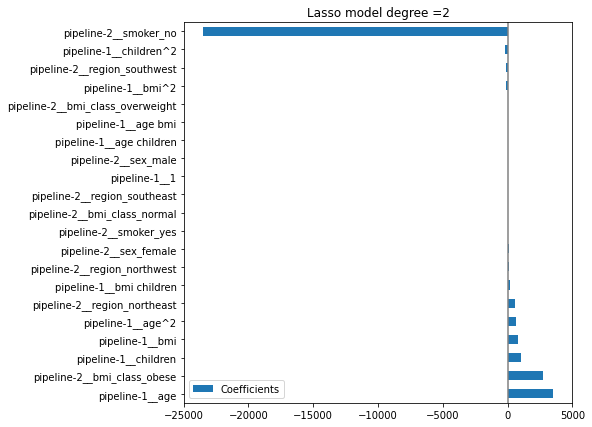

In [144]:
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model degree =2')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.xlim(-25000,5000)

In [145]:

coefs['Coefficients'] = coefs['Coefficients'].apply(lambda x: '{:.6f}'.format(x))
coefs

,Coefficients
pipeline-1__age,3487.207889
pipeline-2__bmi_class_obese,2746.122767
pipeline-1__children,1017.929778
pipeline-1__bmi,804.952460
pipeline-1__age^2,686.500751
pipeline-2__region_northeast,592.960684
pipeline-1__bmi children,180.080895
pipeline-2__region_northwest,123.967568
pipeline-2__sex_female,82.097857
pipeline-2__smoker_yes,0.000000
